Title: "Harnessing Machine Learning for Precision Medicine: A Comparative Study of Predictive Models in Oncology, Endocrinology, and Cardiology"

Abstract:
Precision medicine aims to optimize patient care by tailoring treatments to individuals based on their genetic, environmental, and lifestyle factors. Machine learning has emerged as a powerful tool in the pursuit of precision medicine, offering the potential to develop predictive models for various medical conditions. In this study, we systematically evaluate and compare the performance of several machine learning algorithms on three medical classification problems: breast cancer diagnosis, diabetes prediction, and heart disease risk assessment. By applying logistic regression, decision trees, random forests, gradient boosting, and other algorithms, we identify the most effective techniques for each dataset. Our comprehensive analysis provides insights into the applicability and utility of machine learning in precision medicine, highlighting its potential to enhance clinical decision-making and improve patient outcomes.

Keywords: machine learning, precision medicine, breast cancer, diabetes, heart disease, classification, predictive modeling

Introduction
Precision medicine represents a paradigm shift in healthcare, focusing on the development of personalized treatments tailored to the unique genetic, environmental, and lifestyle factors of individual patients. Machine learning techniques have emerged as valuable tools for realizing the promise of precision medicine, as they can be used to build predictive models capable of identifying patterns and relationships within complex medical data.

In this study, we aim to evaluate and compare the performance of various machine learning algorithms in the context of three distinct medical classification problems: breast cancer diagnosis, diabetes prediction, and heart disease risk assessment. These conditions have been chosen due to their significant impact on global health and their potential to benefit from more accurate and personalized diagnostic and prognostic tools.

Our objectives are threefold:

1. To apply a range of machine learning algorithms, including logistic regression, decision trees, random forests, gradient boosting, and others, to each of the medical datasets.
2. To systematically evaluate and compare the performance of these algorithms based on relevant metrics, such as accuracy, precision, recall, F1-score, and area under the receiver operating characteristic curve (AUC-ROC).
3. To identify the most effective techniques for each medical classification problem, providing insights into the utility of machine learning in precision medicine and its potential to support clinical decision-making.  

The remainder of this paper is organized as follows. Section 2 presents a review of the relevant literature on machine learning applications in precision medicine and medical classification problems. In Section 3, we describe the datasets used in our study, along with the preprocessing and feature engineering techniques applied to each. Section 4 outlines the machine learning algorithms employed in our analysis and provides details on the model training, validation, and evaluation process. The results of our comparative study are presented and discussed in Section 5, followed by a broader discussion of our findings and their implications for the field of precision medicine in Section 6. Finally, we conclude the paper in Section 7 by summarizing our key findings and suggesting directions for future research.

In [43]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# Download the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
response = requests.get(url)
with open("processed.cleveland.data", "wb") as f:
    f.write(response.content)

# Load the dataset
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']
df = pd.read_csv("processed.cleveland.data", names=column_names, na_values="?")

The na_values parameter in the pd.read_csv() function is used to specify additional strings to recognize as NaN (Not a Number) or missing values when reading a CSV file. In your example, the na_values="?" argument indicates that if there is a question mark "?" in the dataset, it should be considered as a missing value (NaN) while reading the CSV file.

By setting na_values="?", you are telling pandas to treat any cell containing a question mark as a missing value, which can be helpful for handling and processing the data later in the analysis.

In [44]:
# Check for null values in columns
null_values = df.isnull().sum()
print(null_values)

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64


In [45]:
# Preprocessing
# Replace missing values with the median of the corresponding feature
for column in df.columns:
    df[column].fillna(df[column].median(), inplace=True)

In [46]:
df['num'].value_counts()

num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64

The target variable 'num' originally has 5 classes, representing the different levels of heart disease severity. Here's what each class represents:

0: Absence of heart disease  

1: Presence of heart disease with mild severity  

2: Presence of heart disease with moderate severity  

3: Presence of heart disease with high severity  

4: Presence of heart disease with very high severity  

the target variable 'num' is transformed into a binary classification problem by applying the following lambda function:  

df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)  

After this transformation, the classes become:  


0: Absence of heart disease  

1: Presence of heart disease (regardless of severity)

In [47]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


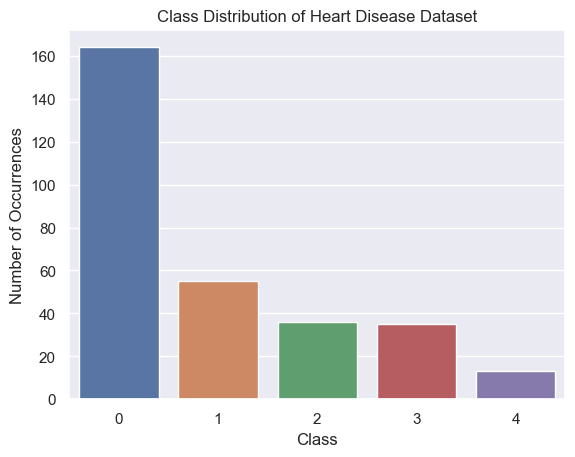

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have loaded the heart disease dataset into a pandas dataframe named 'df'

# Visualize the class distribution using seaborn
sns.set(style='darkgrid')
sns.countplot(x='num', data=df)

# Add labels to the plot
plt.title('Class Distribution of Heart Disease Dataset')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Class', fontsize=12)

# Display the plot, which shows the number of samples belonging to each class
plt.show()


In [49]:
# Convert the target variable 'num' into a binary classification problem
df['num'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [50]:
df["num"].value_counts()

num
0    164
1    139
Name: count, dtype: int64

In [51]:
df.shape

(303, 14)

In [52]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, balanced_accuracy_score, cohen_kappa_score)
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier


# Prepare your dataset for classification
X = df.drop('num', axis=1)  # Replace 'target' with the name of your target column
y = df['num']  # Replace 'target' with the name of your target column

# Feature scaling using Min-Max scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machines - Linear': LinearSVC(dual=False),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Extra Trees Classifier': ExtraTreesClassifier(random_state=42),
    'Light Gradient Boosting Machine': LGBMClassifier(random_state=42),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42),
    'AdaBoost Classifier': AdaBoostClassifier(random_state=42),
    'XGBoost Classifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Ridge Classifier': RidgeClassifier(random_state=42),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}

voting_classifier = VotingClassifier(estimators=list(classifiers.items()), voting='hard')
classifiers['Voting Classifier'] = voting_classifier


# Calculate metrics for each classifier
metrics = []

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    #balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)

    if hasattr(classifier, "predict_proba"):
        y_proba = classifier.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = np.nan
    
    metrics.append([name, accuracy, precision, recall, f1, cohen_kappa, roc_auc])

# Print metrics in a table
metrics_df = pd.DataFrame(metrics, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cohen Kappa', 'ROC AUC'])
print(metrics_df)

C:\Users\hotpr\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


                          Classifier  Accuracy  Precision   Recall  F1 Score   
0                Logistic Regression  0.885246   0.878788  0.90625  0.892308  \
1                k-Nearest Neighbors  0.918033   0.935484  0.90625  0.920635   
2                        Naive Bayes  0.836066   0.892857  0.78125  0.833333   
3                      Decision Tree  0.754098   0.774194  0.75000  0.761905   
4   Support Vector Machines - Linear  0.885246   0.878788  0.90625  0.892308   
5                      Random Forest  0.868852   0.900000  0.84375  0.870968   
6             Extra Trees Classifier  0.868852   0.928571  0.81250  0.866667   
7    Light Gradient Boosting Machine  0.901639   0.933333  0.87500  0.903226   
8       Gradient Boosting Classifier  0.852459   0.870968  0.84375  0.857143   
9                AdaBoost Classifier  0.836066   0.892857  0.78125  0.833333   
10                XGBoost Classifier  0.836066   0.866667  0.81250  0.838710   
11                  Ridge Classifier  0.

C:\Users\hotpr\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [ ]:
metrics_df.to_excel('Eval1.xlsx')

In [53]:
import pandas as pd

# Assuming you have the metrics list as mentioned in the code

# Sort the metrics list based on accuracy in descending order
metrics.sort(key=lambda x: x[1], reverse=True)

# Select the top 6 classifiers based on accuracy
top_classifiers = metrics[:6]

# Create a dataframe to display the top classifiers
top_classifiers_df = pd.DataFrame(top_classifiers, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cohen Kappa', 'ROC AUC'])

# Print the top classifiers dataframe
print("Top 6 Classifiers:")
print(top_classifiers_df)

Top 6 Classifiers:
                         Classifier  Accuracy  Precision   Recall  F1 Score   
0               k-Nearest Neighbors  0.918033   0.935484  0.90625  0.920635  \
1   Light Gradient Boosting Machine  0.901639   0.933333  0.87500  0.903226   
2               Logistic Regression  0.885246   0.878788  0.90625  0.892308   
3  Support Vector Machines - Linear  0.885246   0.878788  0.90625  0.892308   
4                  Ridge Classifier  0.885246   0.878788  0.90625  0.892308   
5      Linear Discriminant Analysis  0.885246   0.878788  0.90625  0.892308   

   Cohen Kappa   ROC AUC  
0     0.835933  0.955280  
1     0.803437  0.936422  
2     0.769563  0.920259  
3     0.769563       NaN  
4     0.769563       NaN  
5     0.769563  0.943966  


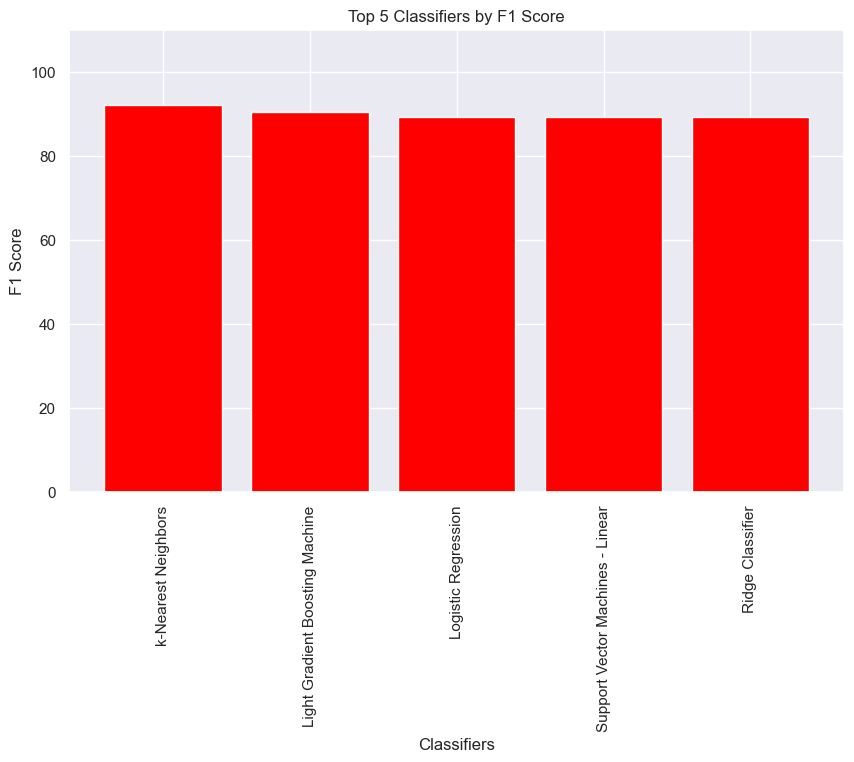

<Figure size 640x480 with 0 Axes>

In [54]:
# Sort the metrics list based on accuracy in descending order
metrics.sort(key=lambda x: x[4], reverse=True)

# Select the top 5 classifiers based on accuracy
top_classifiers = metrics[:5]
classs=[classifier[0] for classifier in top_classifiers]

top_5_scores = [classifier[4]*100 for classifier in top_classifiers]
 
# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(classs, top_5_scores, color='red')
plt.xlabel("Classifiers")
plt.ylabel("F1 Score")
plt.title("Top 5 Classifiers by F1 Score")
plt.ylim(0, 110)
plt.xticks(rotation=90)
plt.show()
plt.savefig("output1", facecolor='y', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
#plt.savefig('kidney', transparent = False)

To display all columns or rows without truncation in pandas, you can adjust the pandas display options using pd.set_option(). Here's how to do it:

In [ ]:
import pandas as pd

# Set the display options for columns
pd.set_option('display.max_columns', None)  # To show all columns on the same line
pd.set_option('display.width', None)  # To adjust the display width to show columns without wrapping

# Set the display options for rows
pd.set_option('display.max_rows', None)  # To show all rows


# Breast Cancer

In [36]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

# Load the breast cancer dataset
breast_cancer_data = load_breast_cancer()

# Convert to a pandas DataFrame
breast_cancer_df = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)
breast_cancer_df['target'] = breast_cancer_data.target


In [37]:
breast_cancer_df.shape

(569, 31)

In [38]:
# Check for null values in columns
null_values = breast_cancer_df.isnull().sum()
print(null_values)

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


In [39]:
breast_cancer_df['target'].value_counts()

target
1    357
0    212
Name: count, dtype: int64

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, balanced_accuracy_score, cohen_kappa_score)
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


# Prepare your dataset for classification
X = breast_cancer_df.drop('target', axis=1)  # Replace 'target' with the name of your target column
y = breast_cancer_df['target']  # Replace 'target' with the name of your target column

# Feature scaling using Min-Max scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machines - Linear': LinearSVC(dual=False),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Extra Trees Classifier': ExtraTreesClassifier(random_state=42),
    'Light Gradient Boosting Machine': LGBMClassifier(random_state=42),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42),
    'AdaBoost Classifier': AdaBoostClassifier(random_state=42),
    'XGBoost Classifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Ridge Classifier': RidgeClassifier(random_state=42),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}

# Calculate metrics for each classifier
metrics = []

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    #balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cohen_kappa = cohen_kappa_score(y_test, y_pred)

    if hasattr(classifier, "predict_proba"):
        y_proba = classifier.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_proba)
    else:
        roc_auc = np.nan
    
    metrics.append([name, accuracy, precision, recall, f1, cohen_kappa, roc_auc])

# Print metrics in a table
metrics_df = pd.DataFrame(metrics, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cohen Kappa', 'ROC AUC'])
print(metrics_df)


C:\Users\hotpr\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


                          Classifier  Accuracy  Precision    Recall  F1 Score   
0                Logistic Regression  0.982456   0.972603  1.000000  0.986111  \
1                k-Nearest Neighbors  0.964912   0.971831  0.971831  0.971831   
2                        Naive Bayes  0.964912   0.958904  0.985915  0.972222   
3                      Decision Tree  0.947368   0.957746  0.957746  0.957746   
4   Support Vector Machines - Linear  0.973684   0.972222  0.985915  0.979021   
5                      Random Forest  0.964912   0.958904  0.985915  0.972222   
6             Extra Trees Classifier  0.964912   0.958904  0.985915  0.972222   
7    Light Gradient Boosting Machine  0.964912   0.958904  0.985915  0.972222   
8       Gradient Boosting Classifier  0.956140   0.958333  0.971831  0.965035   
9                AdaBoost Classifier  0.973684   0.972222  0.985915  0.979021   
10                XGBoost Classifier  0.956140   0.958333  0.971831  0.965035   
11                  Ridge Cl

In [41]:
import pandas as pd

# Assuming you have the metrics list as mentioned in the code

# Sort the metrics list based on accuracy in descending order
metrics.sort(key=lambda x: x[1], reverse=True)

# Select the top 6 classifiers based on accuracy
top_classifiers = metrics[:6]

# Create a dataframe to display the top classifiers
top_classifiers_df = pd.DataFrame(top_classifiers, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cohen Kappa', 'ROC AUC'])

# Print the top classifiers dataframe
print("Top 6 Classifiers:")
print(top_classifiers_df)

Top 6 Classifiers:
                         Classifier  Accuracy  Precision    Recall  F1 Score   
0               Logistic Regression  0.982456   0.972603  1.000000  0.986111  \
1  Support Vector Machines - Linear  0.973684   0.972222  0.985915  0.979021   
2               AdaBoost Classifier  0.973684   0.972222  0.985915  0.979021   
3               k-Nearest Neighbors  0.964912   0.971831  0.971831  0.971831   
4                       Naive Bayes  0.964912   0.958904  0.985915  0.972222   
5                     Random Forest  0.964912   0.958904  0.985915  0.972222   

   Cohen Kappa   ROC AUC  
0     0.962314  0.998035  
1     0.943731       NaN  
2     0.943731  0.997052  
3     0.925319  0.983459  
4     0.924628  0.997380  
5     0.924628  0.995251  


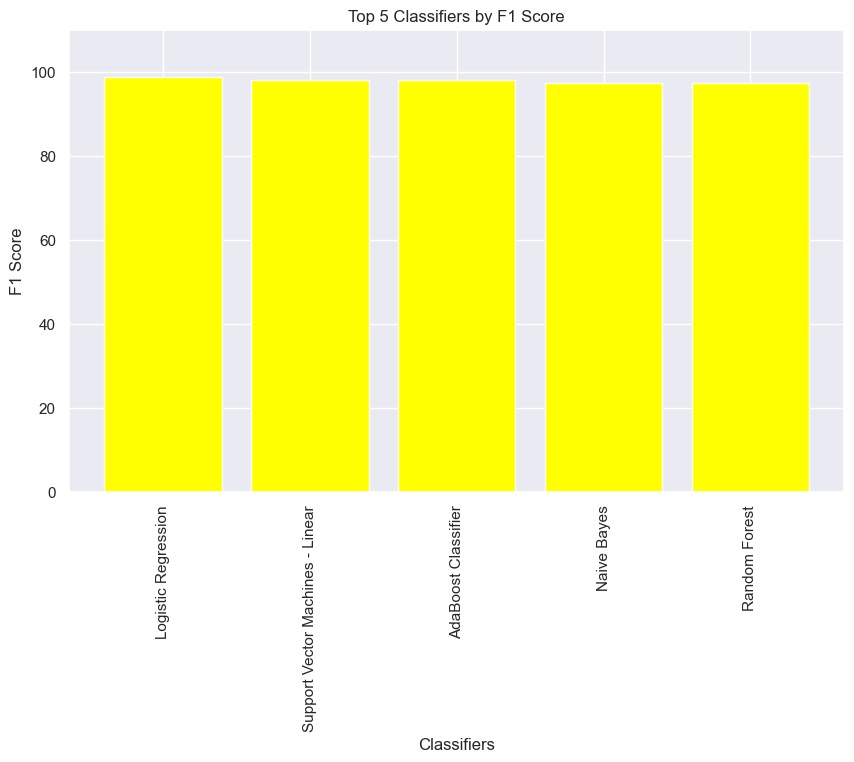

<Figure size 640x480 with 0 Axes>

In [42]:
# Sort the metrics list based on accuracy in descending order
metrics.sort(key=lambda x: x[4], reverse=True)

# Select the top 5 classifiers based on accuracy
top_classifiers = metrics[:5]
classs=[classifier[0] for classifier in top_classifiers]

top_5_scores = [classifier[4]*100 for classifier in top_classifiers]
 
# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(classs, top_5_scores, color='yellow')
plt.xlabel("Classifiers")
plt.ylabel("F1 Score")
plt.title("Top 5 Classifiers by F1 Score")
plt.ylim(0, 110)
plt.xticks(rotation=90)
plt.show()
plt.savefig("output1", facecolor='y', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
#plt.savefig('kidney', transparent = False)

# Kidney Stone

In [22]:
import pandas as pd

# Load the diabetes dataset
kidney_df = pd.read_csv('kidney-stone-dataset.csv')
kidney_df.head()

,Unnamed: 0,gravity,ph,osmo,cond,urea,calc,target
0,0,1.021,4.91,725,14.0,443,2.45,0
1,1,1.017,5.74,577,20.0,296,4.49,0
2,2,1.008,7.20,321,14.9,101,2.36,0
3,3,1.011,5.51,408,12.6,224,2.15,0
4,4,1.005,6.52,187,7.5,91,1.16,0


In [23]:
 # Check for null values in columns
null_values = kidney_df.isnull().sum()
print(null_values)

Unnamed: 0    0
gravity       0
ph            0
osmo          0
cond          0
urea          0
calc          0
target        0
dtype: int64


In [24]:
kidney_df.shape

(90, 8)

In [25]:
kidney_df['target'].value_counts

<bound method IndexOpsMixin.value_counts of 0     0
1     0
2     0
3     0
4     0
     ..
85    1
86    1
87    1
88    1
89    1
Name: target, Length: 90, dtype: int64>

In [26]:
kidney_df = kidney_df.drop(kidney_df.columns[0], axis=1)
kidney_df

,gravity,ph,osmo,cond,urea,calc,target
0,1.021000,4.910000,725,14.000000,443,2.450000,0
1,1.017000,5.740000,577,20.000000,296,4.490000,0
2,1.008000,7.200000,321,14.900000,101,2.360000,0
3,1.011000,5.510000,408,12.600000,224,2.150000,0
4,1.005000,6.520000,187,7.500000,91,1.160000,0
...,...,...,...,...,...,...,...
85,1.021452,5.556081,756,24.241481,367,7.669120,1
86,1.016501,6.900257,549,20.549790,204,5.775256,1
87,1.032754,5.443491,1085,23.188653,576,8.664169,1
88,1.023870,5.106433,325,12.124689,50,0.781620,1


In [27]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
                             confusion_matrix, balanced_accuracy_score, cohen_kappa_score)
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold


# Prepare your dataset for classification
X = kidney_df.drop('target', axis=1)  # Replace 'target' with the name of your target column
y = kidney_df['target']  # Replace 'target' with the name of your target column

# Feature scaling using Min-Max scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
X= scaler.fit_transform(X)

# scaler = StandardScaler()
# X= scaler.fit_transform(X)

# Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'k-Nearest Neighbors': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Support Vector Machines - Linear': LinearSVC(dual=False),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Extra Trees Classifier': ExtraTreesClassifier(random_state=42),
    'Light Gradient Boosting Machine': LGBMClassifier(random_state=42),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=42),
    'AdaBoost Classifier': AdaBoostClassifier(random_state=42),
    'XGBoost Classifier': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    'Ridge Classifier': RidgeClassifier(random_state=42),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis()
}

# metrics = []

# for name, classifier in classifiers.items():
#     classifier.fit(X_train, y_train)
#     y_pred = classifier.predict(X_test)

#     accuracy = accuracy_score(y_test, y_pred)
#     #balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
#     precision = precision_score(y_test, y_pred)
#     recall = recall_score(y_test, y_pred)
#     f1 = f1_score(y_test, y_pred)
#     cohen_kappa = cohen_kappa_score(y_test, y_pred)

#     if hasattr(classifier, "predict_proba"):
#         y_proba = classifier.predict_proba(X_test)[:, 1]
#         roc_auc = roc_auc_score(y_test, y_proba)
#     else:
#         roc_auc = np.nan
    
#     metrics.append([name, accuracy, precision, recall, f1, cohen_kappa, roc_auc])

# # Print metrics in a table
# metrics_df = pd.DataFrame(metrics, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cohen Kappa', 'ROC AUC'])
# print(metrics_df)


# Calculate metrics for each classifier
metrics = []
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

for name, classifier in classifiers.items():
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    cohen_kappa_scores = []
    roc_auc_scores = []
    
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        cohen_kappa = cohen_kappa_score(y_test, y_pred)

        if hasattr(classifier, "predict_proba"):
            y_proba = classifier.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_proba)
        else:
            roc_auc = np.nan

        accuracy_scores.append(accuracy)
        precision_scores.append(precision)
        recall_scores.append(recall)
        f1_scores.append(f1)
        cohen_kappa_scores.append(cohen_kappa)
        roc_auc_scores.append(roc_auc)

    accuracy_mean = np.mean(accuracy_scores)
    precision_mean = np.mean(precision_scores)
    recall_mean = np.mean(recall_scores)
    f1_mean = np.mean(f1_scores)
    cohen_kappa_mean = np.mean(cohen_kappa_scores)
    roc_auc_mean = np.nanmean(roc_auc_scores)

    metrics.append([name, accuracy_mean, precision_mean, recall_mean, f1_mean, cohen_kappa_mean, roc_auc_mean])

# Print metrics in a table
metrics_df = pd.DataFrame(metrics, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cohen Kappa', 'ROC AUC'])
print(metrics_df)


C:\Users\hotpr\anaconda3\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
C:\Users\hotpr\AppData\Local\Temp\ipykernel_3784\3467753691.py:120: RuntimeWarning: Mean of empty slice
  roc_auc_mean = np.nanmean(roc_auc_scores)


                          Classifier  Accuracy  Precision    Recall  F1 Score   
0                Logistic Regression  0.688889   0.719444  0.667692  0.666754  \
1                k-Nearest Neighbors  0.766667   0.730909  0.775897  0.740980   
2                        Naive Bayes  0.644444   0.640556  0.663077  0.641286   
3                      Decision Tree  0.733333   0.750000  0.765128  0.728716   
4   Support Vector Machines - Linear  0.755556   0.787937  0.698462  0.734810   
5                      Random Forest  0.811111   0.782778  0.875897  0.807945   
6             Extra Trees Classifier  0.811111   0.788333  0.804615  0.785889   
7    Light Gradient Boosting Machine  0.766667   0.767980  0.749231  0.738342   
8       Gradient Boosting Classifier  0.777778   0.769408  0.815897  0.767441   
9                AdaBoost Classifier  0.811111   0.800000  0.840513  0.802326   
10                XGBoost Classifier  0.733333   0.700758  0.769231  0.718680   
11                  Ridge Cl

C:\Users\hotpr\AppData\Local\Temp\ipykernel_3784\3467753691.py:120: RuntimeWarning: Mean of empty slice
  roc_auc_mean = np.nanmean(roc_auc_scores)


In [ ]:
import pandas as pd

# Assuming you have the metrics list as mentioned in the code

# Sort the metrics list based on accuracy in descending order
metrics.sort(key=lambda x: x[1], reverse=True)

# Select the top 6 classifiers based on accuracy
top_classifiers = metrics[:6]

# Create a dataframe to display the top classifiers
top_classifiers_df = pd.DataFrame(top_classifiers, columns=['Classifier', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Cohen Kappa', 'ROC AUC'])

# Print the top classifiers dataframe
print("Top 6 Classifiers:")
print(top_classifiers_df)

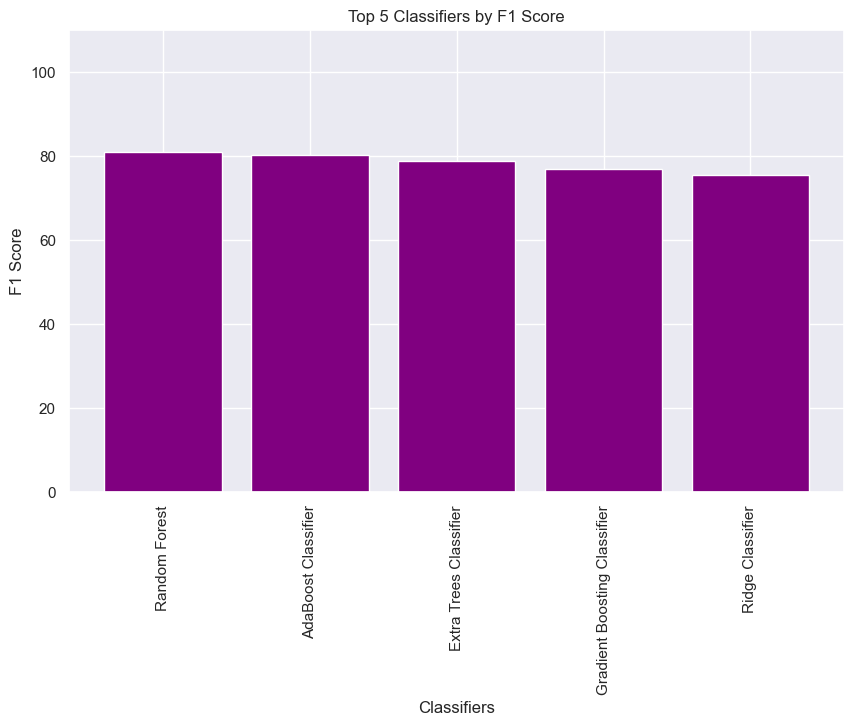

<Figure size 640x480 with 0 Axes>

In [35]:
# Sort the metrics list based on accuracy in descending order
metrics.sort(key=lambda x: x[4], reverse=True)

# Select the top 5 classifiers based on accuracy
top_classifiers = metrics[:5]
classs=[classifier[0] for classifier in top_classifiers]

top_5_scores = [classifier[4]*100 for classifier in top_classifiers]
 
# Plot the graph
plt.figure(figsize=(10, 6))
plt.bar(classs, top_5_scores, color='purple')
plt.xlabel("Classifiers")
plt.ylabel("F1 Score")
plt.title("Top 5 Classifiers by F1 Score")
plt.ylim(0, 110)
plt.xticks(rotation=90)
plt.show()
plt.savefig("output1", facecolor='y', bbox_inches="tight",
            pad_inches=0.3, transparent=True)
#plt.savefig('kidney', transparent = False)

In [ ]:
metrics_df.to_excel('Eval.xlsx')